**Notebook to model electricity price differences.**<br>

Brief summary of the exercise:
* Target: predict the price change of electricity from the Close price of one hour to the Close price of the next hour
* Input: the elementwise difference between the hourly 'candels' of the electricity price; explanation follows.

  Hourly candels refers to the Open, High, Low, Close prices and the total Volume traded within an hour; thus each hourly candel has five elements. Historically, one could reconstruct these candels for each consecutive hour. We refer to the length of history for which the candels are reconstructed as 'window_size'. Thus, for a window_size of 5, one has candels from 5 consecutive hours.
  
  Left to explain is the 'elementwise difference' remark. Out of the N window_size of history, we compute differences between the consecutive candels: Open in t minus Open in t-1, Low in t minus low in t-1, etc. Thus, from N candels we create N-1 differentiated candels.

  In this exercise, the elementwise differentiated data for window_sizes of 5 and 15 are provided

  The data is further enchanced by mostly encoded time-related information. These encode what day of the week the data correspond to, whether the day is a bank holiday or not, etc. A list will be given further below.

* ML models are to be built to predict the Target from the Input data.

In [1]:
# Demonstration data used in this excercise is already preprocessed and split into
# training, validation, and test sets

# Use wget to download the data stored in csv format.
import itertools

# Define what files to download; download all of the preprocessed data
# Note that the data are already split into Train, Validation, and Test sets.
# The predictor data are denoted with 'X', the target by 'y'
data_download = {}
data_download["window_size"] = [5, 15]
data_download["data_type"] = ["train", "valid", "test"]
data_download["predictor_or_target"] = ["X", "y"]

# Prepare the combinations of the window sizes and the data types
keys, values = zip(*data_download.items())
data_download_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
display('The kind of data to be downloaded:', data_download_combinations)

print("Downloading started...")
for data_download_param in data_download_combinations:
  file_to_download = "https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_{0}_time_encoding_True/{1}_{2}_window_size_{0}_time_encoding_True.csv"\
                     .format(data_download_param["window_size"], data_download_param["predictor_or_target"], data_download_param["data_type"])

  # the actual downloading
  !wget "$file_to_download"

print("Downloading has finished")


'The kind of data to be downloaded:'

[{'window_size': 5, 'data_type': 'train', 'predictor_or_target': 'X'},
 {'window_size': 5, 'data_type': 'train', 'predictor_or_target': 'y'},
 {'window_size': 5, 'data_type': 'valid', 'predictor_or_target': 'X'},
 {'window_size': 5, 'data_type': 'valid', 'predictor_or_target': 'y'},
 {'window_size': 5, 'data_type': 'test', 'predictor_or_target': 'X'},
 {'window_size': 5, 'data_type': 'test', 'predictor_or_target': 'y'},
 {'window_size': 15, 'data_type': 'train', 'predictor_or_target': 'X'},
 {'window_size': 15, 'data_type': 'train', 'predictor_or_target': 'y'},
 {'window_size': 15, 'data_type': 'valid', 'predictor_or_target': 'X'},
 {'window_size': 15, 'data_type': 'valid', 'predictor_or_target': 'y'},
 {'window_size': 15, 'data_type': 'test', 'predictor_or_target': 'X'},
 {'window_size': 15, 'data_type': 'test', 'predictor_or_target': 'y'}]

--2021-10-07 17:15:50--  https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_5_time_encoding_True/X_train_window_size_5_time_encoding_True.csv
Resolving frankfurt-school-dataset.s3.eu-central-1.amazonaws.com (frankfurt-school-dataset.s3.eu-central-1.amazonaws.com)... 52.219.75.232, 52.219.72.120
Connecting to frankfurt-school-dataset.s3.eu-central-1.amazonaws.com (frankfurt-school-dataset.s3.eu-central-1.amazonaws.com)|52.219.75.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53997719 (51M) [text/csv]
Saving to: ‘X_train_window_size_5_time_encoding_True.csv’

X_train_window_size 100%[===================>]  51.50M  11.7MB/s    in 4.5s    

2021-10-07 17:15:54 (11.5 MB/s) - ‘X_train_window_size_5_time_encoding_True.csv’ saved [53997719/53997719]

--2021-10-07 17:15:55--  https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_5_time_encoding_True/y_train_window_size_5_time_encoding_True.csv
Resolvin

In [2]:
# List the directory; the downloaded file should be there. Verify this.
!ls -lh

total 110M
-rwxrwxrwx 1 root   root    56K Oct  1 08:19 Electricity_price_modeling_Sept2021.ipynb
-rwxrwxrwx 1 root   root    141 Oct  7 09:11 README.md
-rw-r--r-- 1 vscode vscode 5.0M Sep  1 15:11 X_test_window_size_15_time_encoding_True.csv
-rw-r--r-- 1 vscode vscode 6.2M Sep  1 15:09 X_test_window_size_5_time_encoding_True.csv
-rw-r--r-- 1 vscode vscode  41M Sep  1 15:10 X_train_window_size_15_time_encoding_True.csv
-rw-r--r-- 1 vscode vscode  52M Sep  1 15:09 X_train_window_size_5_time_encoding_True.csv
-rw-r--r-- 1 vscode vscode 2.2M Sep  1 15:11 X_valid_window_size_15_time_encoding_True.csv
-rw-r--r-- 1 vscode vscode 2.8M Sep  1 15:09 X_valid_window_size_5_time_encoding_True.csv
-rwxrwxrwx 1 root   root     32 Oct  7 10:12 requirements.txt
-rw-r--r-- 1 vscode vscode  61K Sep  1 15:10 y_test_window_size_15_time_encoding_True.csv
-rw-r--r-- 1 vscode vscode 178K Sep  1 15:09 y_test_window_size_5_time_encoding_True.csv
-rw-r--r-- 1 vscode vscode 519K Sep  1 15:11 y_train_window_size_

In [1]:
# Load the data using the pandas library
# For the below demonstration, only the
#    * window_size of 5 files
#    * and only the training sets will be loaded here
# The validation and test sets can be similarly loaded.
# One can also use a similar kind of method for loading as was used for the download
# This can avoid the many lines of manual specification of the files. Manual is also fine, btw.

import pandas as pd

X_train_window_size_5 = pd.read_csv('data/X_train_window_size_5_time_encoding_True.csv')
y_train_window_size_5 = pd.read_csv('data/y_train_window_size_5_time_encoding_True.csv')

# Display the first 5 rows of the predictor and the target data; for a description of the content, see the text below this cell
print("Predictor data:")
display(X_train_window_size_5.head(10))
print("Target data:")
display(y_train_window_size_5.head())

Predictor data:


,total_hours,dlvry_weekend,dlvry_bank_holiday,dlvry_day_sin,dlvry_day_cos,dlvry_weekday_sin,dlvry_weekday_cos,dlvry_hour_sin,dlvry_hour_cos,lasttrade_weekend,...,14,15,16,17,18,19,20,21,22,23
0,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,...,5.39,5.41,187.7,480.0,4.41,-0.21,1.30,-1.31,-18.2,420.0
1,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,...,1.30,-1.31,-18.2,420.0,-0.31,-0.20,-0.66,-3.18,-78.3,360.0
2,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,...,-0.66,-3.18,-78.3,360.0,-3.49,-2.59,-7.97,-3.21,796.3,300.0
3,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,...,-7.97,-3.21,796.3,300.0,-2.90,-1.69,2.44,-0.01,-355.6,240.0
4,10.001383,1.0,0.0,0.201299,0.979530,-0.781831,0.62349,-0.500000,0.866025,1.0,...,2.44,-0.01,-355.6,240.0,-0.70,-1.11,-1.11,-2.69,53.3,180.0
5,7.080482,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.258819,0.965926,1.0,...,-2.65,-2.21,555.0,300.0,-1.90,1.10,0.38,1.61,-332.7,240.0
6,7.080482,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.258819,0.965926,1.0,...,0.38,1.61,-332.7,240.0,1.94,-1.58,-2.42,-2.26,421.6,180.0
7,7.726036,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.500000,0.866025,1.0,...,-0.70,2.23,-86.4,300.0,3.02,-0.40,-1.93,-2.61,377.2,240.0
8,7.726036,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.500000,0.866025,1.0,...,-1.93,-2.61,377.2,240.0,-2.61,-1.70,0.23,0.49,104.2,180.0
9,8.726036,0.0,0.0,0.394356,0.918958,0.000000,1.00000,0.707107,0.707107,1.0,...,1.99,7.16,108.5,360.0,5.08,-2.93,-0.99,-3.26,121.3,300.0


Target data:


,y
0,-3.18
1,-3.21
2,-0.01
3,-2.69
4,2.41


In [6]:
X_train_window_size_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91512 entries, 0 to 91511
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_hours             91512 non-null  float64
 1   dlvry_weekend           91512 non-null  float64
 2   dlvry_bank_holiday      91512 non-null  float64
 3   dlvry_day_sin           91512 non-null  float64
 4   dlvry_day_cos           91512 non-null  float64
 5   dlvry_weekday_sin       91512 non-null  float64
 6   dlvry_weekday_cos       91512 non-null  float64
 7   dlvry_hour_sin          91512 non-null  float64
 8   dlvry_hour_cos          91512 non-null  float64
 9   lasttrade_weekend       91512 non-null  float64
 10  lasttrade_bank_holiday  91512 non-null  float64
 11  lasttrade_day_sin       91512 non-null  float64
 12  lasttrade_day_cos       91512 non-null  float64
 13  lasttrade_weekday_sin   91512 non-null  float64
 14  lasttrade_weekday_cos   91512 non-null

In [8]:
y_train_window_size_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91512 entries, 0 to 91511
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       91512 non-null  float64
dtypes: float64(1)
memory usage: 715.1 KB


In [7]:
X_train_window_size_5.describe()

,total_hours,dlvry_weekend,dlvry_bank_holiday,dlvry_day_sin,dlvry_day_cos,dlvry_weekday_sin,dlvry_weekday_cos,dlvry_hour_sin,dlvry_hour_cos,lasttrade_weekend,...,14,15,16,17,18,19,20,21,22,23
count,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,...,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000,91512.000000
mean,21.076573,0.278215,0.031876,0.049590,-0.031720,0.012716,-0.006560,-0.274853,-0.172969,0.278958,...,-0.055592,0.044150,54.931951,669.619066,0.041233,0.195364,-0.098434,0.032456,87.409425,609.619066
std,5.485763,0.448122,0.175670,0.702321,0.709430,0.706995,0.707081,0.704416,0.631146,0.448489,...,3.128701,2.857961,334.903828,325.538011,2.735750,3.308957,3.002296,3.001645,384.474903,325.538011
min,6.008203,0.000000,0.000000,-0.998717,-1.000000,-0.974928,-0.900969,-1.000000,-1.000000,0.000000,...,-53.600000,-58.000000,-52469.700000,240.000000,-54.000000,-54.420000,-51.060000,-58.000000,-52469.700000,180.000000
25%,16.997189,0.000000,0.000000,-0.651372,-0.758758,-0.781831,-0.900969,-0.866025,-0.707107,0.000000,...,-0.780000,-0.850000,-14.600000,420.000000,-0.800000,-0.710000,-0.830000,-0.900000,-12.900000,360.000000
50%,21.958922,0.000000,0.000000,0.101168,-0.050649,0.000000,-0.222521,-0.500000,-0.258819,0.000000,...,0.000000,0.000000,6.000000,600.000000,0.000000,0.000000,0.000000,0.000000,11.100000,540.000000
75%,25.484821,1.000000,0.000000,0.743145,0.688967,0.781831,0.623490,0.500000,0.500000,1.000000,...,0.710000,0.890000,93.100000,900.000000,0.820000,0.900000,0.720000,0.940000,134.000000,840.000000
max,31.999669,1.000000,1.000000,1.000000,1.000000,0.974928,1.000000,1.000000,1.000000,1.000000,...,60.140000,84.480000,50436.600000,1740.000000,100.420000,133.050000,60.140000,129.110000,50436.600000,1680.000000


**The content of the dataframe is the following:**<br>

Content of the dataframes:
* "y" - Target data
   * y: the Close price in t minus Close price in t-1 Target data
* "X" - Predictor data: various time-encoded data and the differentiated candels:
   * total_hours: hours from the first trade we know for a given contract until delivery start of the same contract
   * dlvry_weekend: whether the electricity is to be delivered on a weekend
   * dlvry_bank_holiday: whether the electricity is to be delivered on a bank holiday
   * dlvry_day_sin and dlvry_day_cos: the sinus-cosinus-encoded value of the day of the delivery day (identifies a day of the week in a circular fashion)
   * dlvry_hour_sin	and dlvry_hour_cos: the sinus-cosinus-encoded value of the delivery hour (idenitifies the hour of the delivery in a circular fashion)
   * lasttrade_...: similar to the delivery time encoding, but for the most recent trading hour used as a candel
   * the numbered columns: window_size - 1 number of differentiated candels with an additional time information: the number of minutes left until delivery start. Example for window_size of 5 follows. Column 0: Open in t-3 minus Open in t-4; Column 1: High in t-3 minus High in t-4; Column 2: similar for Low; Column 3: similar for Close; Column 4: similar for Volume; Column 5: minutes left until the delivery start in candel for t-3; Column 6: Open in t-2 minus Open in t-3; ...; Column 23: minutes left until the delivery start in candel for t

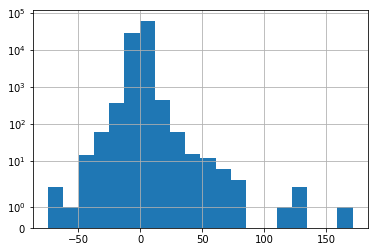

In [2]:
# Plot various aspect of the data to get familiar with it
import matplotlib.pyplot as plt
y_train_window_size_5["y"].hist(bins = 20)
plt.yscale("symlog")
plt.show()

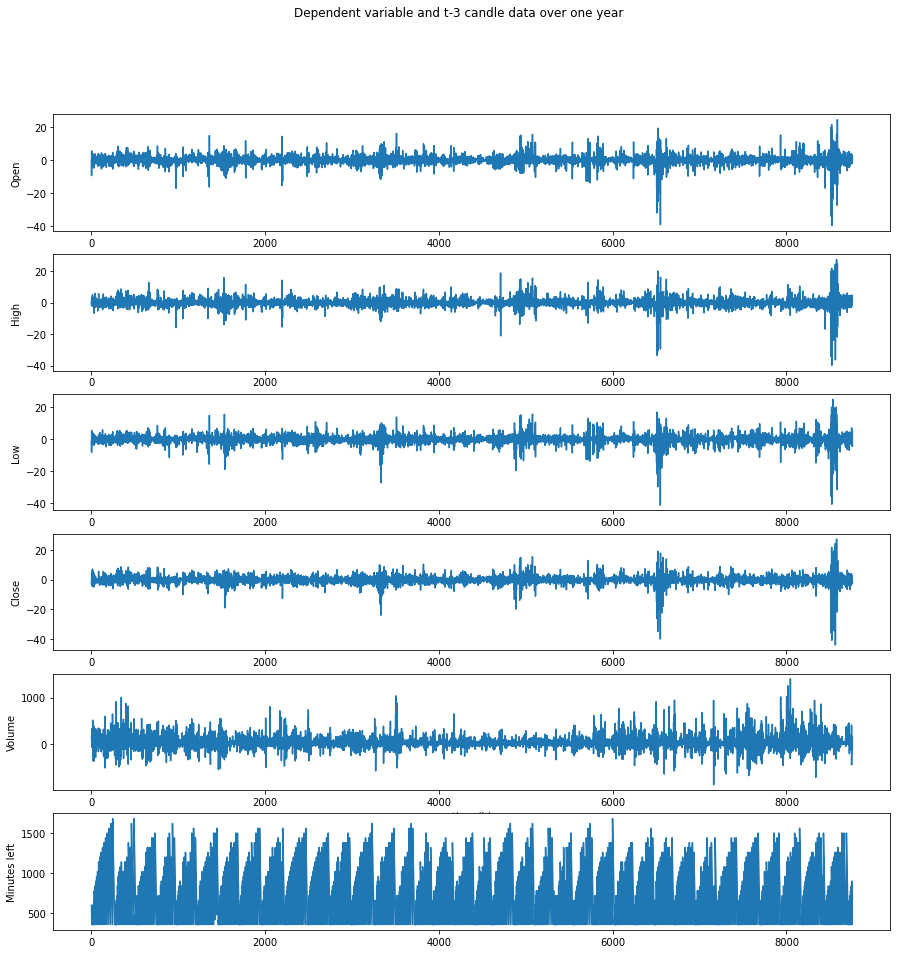

In [41]:
#plt.plot(range(len(y_train_window_size_5)), y_train_window_size_5)
#plt.plot(range(len(y_train_window_size_5)), y_train_window_size_5)

import numpy as np
#ylim = len(y_train_window_size_5)
ylim = 24*365
x1 = np.linspace(0, ylim, num=ylim)

cols = [*range(6)]
labels = ["Open", "High", "Low", "Close", "Volume", "Minutes left"]
ys = []
count = 0
df_plot = X_train_window_size_5.copy().iloc[:(24*365), :]
for col in cols:
    ys.append(df_plot[str(col)])
    count += 1


fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(15,15))
fig.suptitle('Dependent variable and t-3 candle data over one year')


ax1.plot(x1, ys[0])
ax1.set_ylabel(labels[0])

ax2.plot(x1, ys[1])
ax2.set_ylabel(labels[1])

ax3.plot(x1, ys[2])
ax3.set_ylabel(labels[2])

ax4.plot(x1, ys[3])
ax4.set_ylabel(labels[3])

ax5.plot(x1, ys[4])
ax5.set_ylabel(labels[4])

ax6.plot(x1, ys[5])
ax6.set_ylabel(labels[5])

ax5.set_xlabel('time (h)')

plt.show()

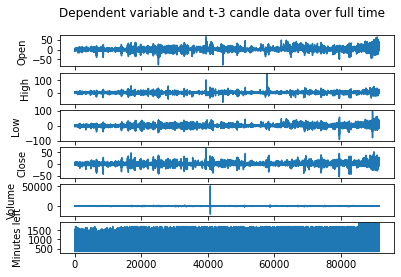

In [ ]:
#plt.plot(range(len(y_train_window_size_5)), y_train_window_size_5)
#plt.plot(range(len(y_train_window_size_5)), y_train_window_size_5)

import numpy as np
x1 = np.linspace(0, len(y_train_window_size_5), num=len(y_train_window_size_5))

cols = [*range(6)]
labels = ["Open", "High", "Low", "Close", "Volume", "Minutes left"]
ys = []
count = 0
df_plot = X_train_window_size_5.copy()
for col in cols:
    ys.append(df_plot[str(col)])
    count += 1


fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1)
fig.suptitle('Dependent variable and t-3 candle data over full time')

ax1.plot(x1, ys[0])
ax1.set_ylabel(labels[0])

ax2.plot(x1, ys[1])
ax2.set_ylabel(labels[1])

ax3.plot(x1, ys[2])
ax3.set_ylabel(labels[2])

ax4.plot(x1, ys[3])
ax4.set_ylabel(labels[3])

ax5.plot(x1, ys[4])
ax5.set_ylabel(labels[4])

ax6.plot(x1, ys[5])
ax6.set_ylabel(labels[5])

ax5.set_xlabel('time (h)')

plt.show()

In [4]:
import tensorflow as tf
tf.config.list_physical_devices()
+üpoiuzte   

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]